In [3]:
import os
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_parquet(os.path.join('data','jizdenky.parquet'))

In [5]:
df = df[df['odkud'].str.contains('Brno') | df['odkud'].str.contains('Praha')]
df = df[df['kam'].str.contains('Brno') | df['kam'].str.contains('Praha')]

In [6]:
df = df[df['prostredek'] != 'autobus']

In [7]:
df = df[df['prestupy'] == 0]

In [8]:
df = df[df['predstih_h'] > 0]

In [9]:
df = df[df['jizdni_doba'] < 180]

In [10]:
df['spoj'] = df.apply(lambda row: f"""{row['prodejce']} {row['den']} {row['odjezd'].hour:02}:{row['odjezd'].minute:02}""", axis=1)

In [11]:
nejdrazsi = df[df['predstih_h'] <= 4].groupby('spoj')['cena'].median()
nejdrazsi = nejdrazsi[nejdrazsi >= 500].index.to_list()

<Axes: xlabel='predstih_d'>

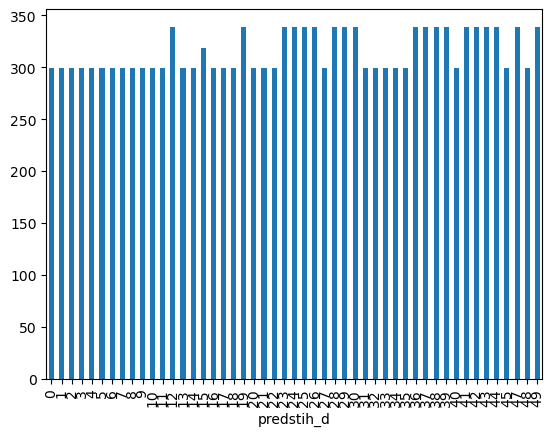

In [12]:
df[df['prodejce'].isin(['RJ'])].groupby('predstih_d')['cena'].median().plot.bar()

<Axes: xlabel='predstih_d'>

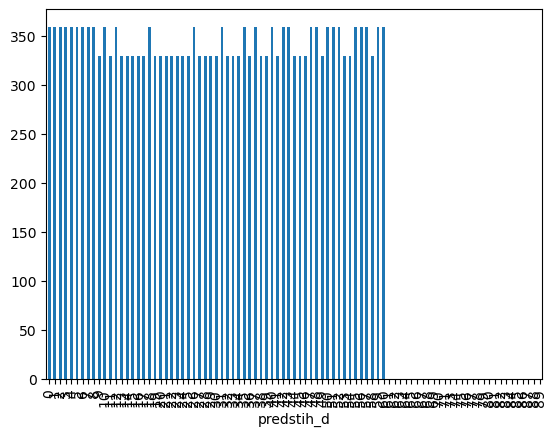

In [13]:
df[df['prodejce'] == 'ČD'].groupby('predstih_d')['cena'].median().plot.bar()

In [14]:
listopad = df[df['odjezd'] < '2024-12-01']['spoj'].drop_duplicates().to_list()
listopad

['ČD pá 00:03',
 'ČD pá 22:03',
 'ČD pá 19:44',
 'ČD pá 18:44',
 'ČD pá 18:03',
 'ČD pá 17:44',
 'ČD pá 14:03',
 'ČD pá 15:44',
 'ČD pá 14:44',
 'ČD pá 16:44',
 'ČD pá 00:40',
 'ČD pá 16:03',
 'ČD pá 13:44',
 'ČD pá 21:03',
 'ČD pá 08:03',
 'ČD pá 11:44',
 'ČD pá 10:44',
 'ČD pá 10:03',
 'ČD pá 12:44',
 'ČD pá 08:44',
 'ČD pá 12:03',
 'ČD pá 09:44',
 'ČD pá 07:44',
 'ČD pá 06:44',
 'ČD pá 05:44',
 'ČD pá 04:42',
 'ČD pá 08:39',
 'ČD pá 12:39',
 'ČD pá 18:39',
 'ČD pá 17:39',
 'ČD pá 16:39',
 'ČD pá 14:39',
 'ČD pá 13:39',
 'ČD pá 15:39',
 'ČD pá 00:29',
 'ČD pá 03:10',
 'ČD pá 04:26',
 'ČD pá 19:39',
 'ČD pá 20:39',
 'ČD pá 10:39',
 'ČD pá 09:39',
 'ČD pá 11:39',
 'ČD pá 07:39',
 'ČD pá 06:39',
 'ČD pá 05:39',
 'ČD so 22:03',
 'ČD so 21:03',
 'ČD so 00:03',
 'ČD so 00:40',
 'ČD so 04:42',
 'ČD so 10:03',
 'ČD so 07:44',
 'ČD so 08:03',
 'ČD so 08:44',
 'ČD so 05:44',
 'ČD so 18:44',
 'ČD so 19:44',
 'ČD so 16:44',
 'ČD so 06:44',
 'ČD so 09:44',
 'ČD so 12:03',
 'ČD so 11:44',
 'ČD so 

In [15]:
leden = df[df['odjezd'] > '2025-01-01']['spoj'].drop_duplicates().to_list()
leden

['ČD čt 06:39',
 'ČD čt 10:39',
 'ČD čt 09:39',
 'ČD čt 08:39',
 'ČD pá 00:29',
 'ČD čt 07:39',
 'ČD čt 20:39',
 'ČD čt 21:39',
 'ČD pá 03:10',
 'ČD čt 12:39',
 'ČD pá 04:26',
 'ČD čt 13:39',
 'ČD čt 11:39',
 'ČD čt 19:39',
 'ČD čt 17:39',
 'ČD čt 18:39',
 'ČD čt 15:39',
 'ČD čt 14:39',
 'ČD čt 16:39',
 'ČD čt 08:40',
 'ČD čt 11:42',
 'ČD čt 10:35',
 'ČD čt 09:42',
 'ČD pá 04:39',
 'ČD čt 06:42',
 'ČD čt 07:42',
 'ČD čt 05:42',
 'ČD čt 12:42',
 'ČD čt 13:42',
 'ČD pá 00:36',
 'ČD čt 16:42',
 'ČD čt 18:42',
 'ČD čt 19:42',
 'ČD čt 17:42',
 'ČD čt 22:01',
 'ČD pá 00:01',
 'ČD čt 15:42',
 'ČD čt 14:42',
 'ČD čt 21:01',
 'ČD so 08:39',
 'ČD pá 10:39',
 'ČD pá 12:39',
 'ČD pá 13:39',
 'ČD so 06:39',
 'ČD so 03:10',
 'ČD pá 14:39',
 'ČD pá 15:39',
 'ČD so 07:39',
 'ČD pá 09:39',
 'ČD so 04:26',
 'ČD so 00:29',
 'ČD pá 21:39',
 'ČD pá 20:39',
 'ČD pá 19:39',
 'ČD pá 17:39',
 'ČD pá 16:39',
 'ČD pá 11:39',
 'ČD pá 18:39',
 'ČD so 05:39',
 'ČD pá 12:42',
 'ČD pá 10:35',
 'ČD pá 11:42',
 'ČD pá 

In [16]:
[x for x in listopad if x in leden]

['ČD pá 08:39',
 'ČD pá 12:39',
 'ČD pá 18:39',
 'ČD pá 17:39',
 'ČD pá 16:39',
 'ČD pá 14:39',
 'ČD pá 13:39',
 'ČD pá 15:39',
 'ČD pá 00:29',
 'ČD pá 03:10',
 'ČD pá 04:26',
 'ČD pá 19:39',
 'ČD pá 20:39',
 'ČD pá 10:39',
 'ČD pá 09:39',
 'ČD pá 11:39',
 'ČD pá 07:39',
 'ČD pá 06:39',
 'ČD pá 05:39',
 'ČD so 00:40',
 'ČD so 15:39',
 'ČD so 16:39',
 'ČD so 17:39',
 'ČD so 18:39',
 'ČD so 21:39',
 'ČD so 19:39',
 'ČD so 20:39',
 'ČD so 05:39',
 'ČD so 04:26',
 'ČD so 09:39',
 'ČD so 00:29',
 'ČD so 03:10',
 'ČD so 14:39',
 'ČD so 13:39',
 'ČD so 07:39',
 'ČD so 08:39',
 'ČD so 06:39',
 'ČD so 12:39',
 'ČD so 10:39',
 'ČD so 11:39',
 'ČD ne 09:39',
 'ČD ne 21:39',
 'ČD ne 16:39',
 'ČD ne 19:39',
 'ČD ne 20:39',
 'ČD ne 00:29',
 'ČD ne 06:39',
 'ČD ne 05:39',
 'ČD ne 03:10',
 'ČD ne 07:39',
 'ČD ne 18:39',
 'ČD ne 08:39',
 'ČD ne 10:39',
 'ČD ne 11:39',
 'ČD ne 12:39',
 'ČD ne 13:39',
 'ČD ne 15:39',
 'ČD ne 17:39',
 'ČD ne 14:39',
 'ČD po 00:40',
 'ČD po 12:39',
 'ČD po 18:39',
 'ČD po 

In [17]:
[x for x in listopad if x not in leden]

['ČD pá 00:03',
 'ČD pá 22:03',
 'ČD pá 19:44',
 'ČD pá 18:44',
 'ČD pá 18:03',
 'ČD pá 17:44',
 'ČD pá 14:03',
 'ČD pá 15:44',
 'ČD pá 14:44',
 'ČD pá 16:44',
 'ČD pá 00:40',
 'ČD pá 16:03',
 'ČD pá 13:44',
 'ČD pá 21:03',
 'ČD pá 08:03',
 'ČD pá 11:44',
 'ČD pá 10:44',
 'ČD pá 10:03',
 'ČD pá 12:44',
 'ČD pá 08:44',
 'ČD pá 12:03',
 'ČD pá 09:44',
 'ČD pá 07:44',
 'ČD pá 06:44',
 'ČD pá 05:44',
 'ČD pá 04:42',
 'ČD so 22:03',
 'ČD so 21:03',
 'ČD so 00:03',
 'ČD so 04:42',
 'ČD so 10:03',
 'ČD so 07:44',
 'ČD so 08:03',
 'ČD so 08:44',
 'ČD so 05:44',
 'ČD so 18:44',
 'ČD so 19:44',
 'ČD so 16:44',
 'ČD so 06:44',
 'ČD so 09:44',
 'ČD so 12:03',
 'ČD so 11:44',
 'ČD so 12:44',
 'ČD so 13:44',
 'ČD so 14:03',
 'ČD so 16:03',
 'ČD so 14:44',
 'ČD so 17:44',
 'ČD so 18:03',
 'ČD so 10:44',
 'ČD so 15:44',
 'ČD ne 17:44',
 'ČD ne 14:44',
 'ČD ne 16:03',
 'ČD ne 16:44',
 'ČD ne 18:03',
 'ČD ne 15:44',
 'ČD ne 18:44',
 'ČD ne 19:44',
 'ČD ne 21:03',
 'ČD ne 12:44',
 'ČD ne 07:44',
 'ČD ne 

In [18]:
[x for x in leden if x not in listopad]

['ČD čt 08:40',
 'ČD čt 11:42',
 'ČD čt 10:35',
 'ČD čt 09:42',
 'ČD pá 04:39',
 'ČD čt 06:42',
 'ČD čt 07:42',
 'ČD čt 05:42',
 'ČD čt 12:42',
 'ČD čt 13:42',
 'ČD pá 00:36',
 'ČD čt 16:42',
 'ČD čt 18:42',
 'ČD čt 19:42',
 'ČD čt 17:42',
 'ČD čt 22:01',
 'ČD pá 00:01',
 'ČD čt 15:42',
 'ČD čt 14:42',
 'ČD čt 21:01',
 'ČD pá 12:42',
 'ČD pá 10:35',
 'ČD pá 11:42',
 'ČD pá 17:42',
 'ČD pá 13:42',
 'ČD pá 14:42',
 'ČD pá 15:42',
 'ČD pá 16:42',
 'ČD pá 18:42',
 'ČD so 00:01',
 'ČD so 05:42',
 'ČD pá 19:42',
 'ČD pá 21:01',
 'ČD so 00:36',
 'ČD so 04:39',
 'ČD pá 22:01',
 'ČD so 08:40',
 'ČD so 07:42',
 'ČD so 06:42',
 'ČD so 18:42',
 'ČD so 11:42',
 'ČD so 12:42',
 'ČD so 13:42',
 'ČD so 14:42',
 'ČD so 16:42',
 'ČD so 17:42',
 'ČD ne 11:42',
 'ČD so 15:42',
 'ČD ne 00:01',
 'ČD ne 07:42',
 'ČD so 22:01',
 'ČD ne 00:36',
 'ČD so 19:42',
 'ČD so 21:01',
 'ČD ne 06:42',
 'ČD ne 05:42',
 'ČD ne 08:40',
 'ČD ne 09:42',
 'ČD ne 10:35',
 'ČD st 16:42',
 'ČD st 17:42',
 'ČD st 18:42',
 'ČD st 

In [19]:
df[df['prodejce'] == 'RJ'][['predstih_h','predstih_d','cena','volnych_mist']].corr()

,predstih_h,predstih_d,cena,volnych_mist
predstih_h,1.000000,0.999487,0.101949,0.092771
predstih_d,0.999487,1.000000,0.101799,0.092779
cena,0.101949,0.101799,1.000000,-0.640644
volnych_mist,0.092771,0.092779,-0.640644,1.000000


In [20]:
df[df['prodejce'] == 'ČD'].explode('obsazenost').groupby('obsazenost')['cena'].median()

obsazenost
Předpokládané nízké obsazení                                              329.0
Předpokládané střední obsazení - doporučujeme včasné pořízení místenky    359.0
Předpokládané vysoké obsazení - doporučujeme včasné pořízení místenky     419.0
Téměr vyprodaná místa k sezení                                            329.0
Name: cena, dtype: float64

<Axes: xlabel='predstih_d'>

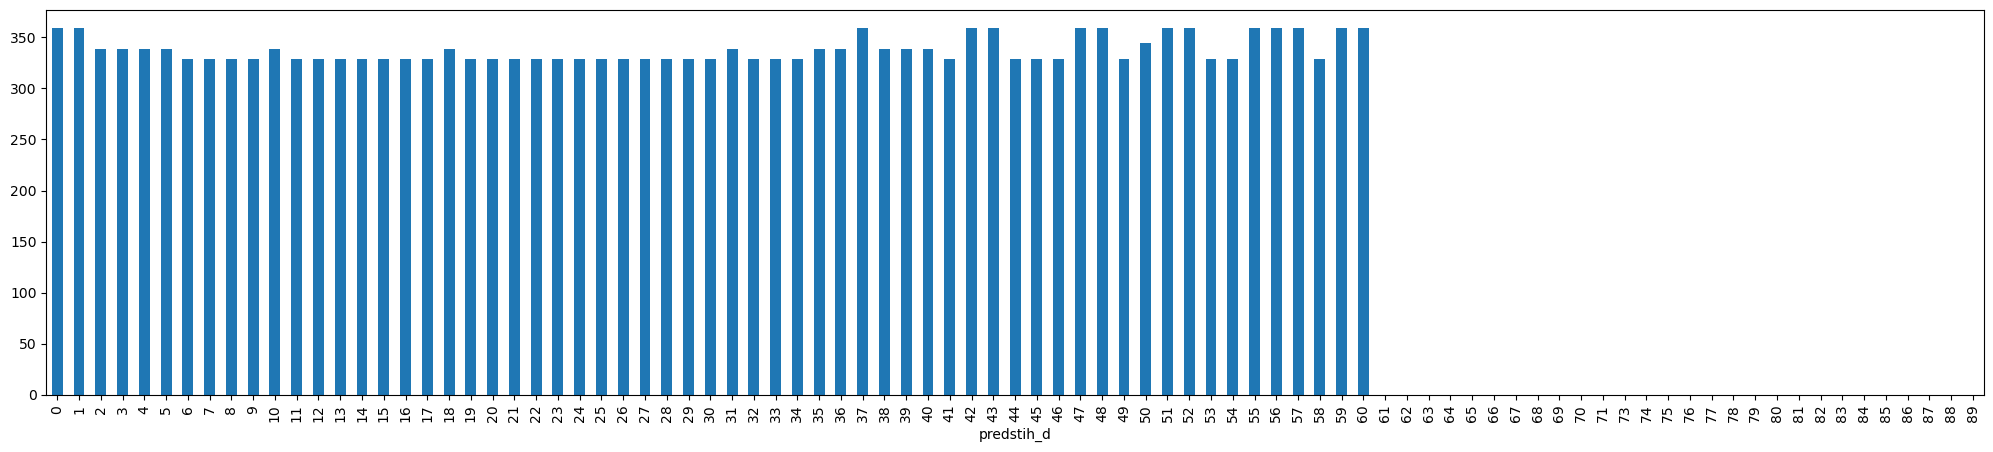

In [21]:
df.drop_duplicates(subset=['odjezd','odkud','kam','predstih_d'], keep='last').groupby('predstih_d')['cena'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='predstih_d'>

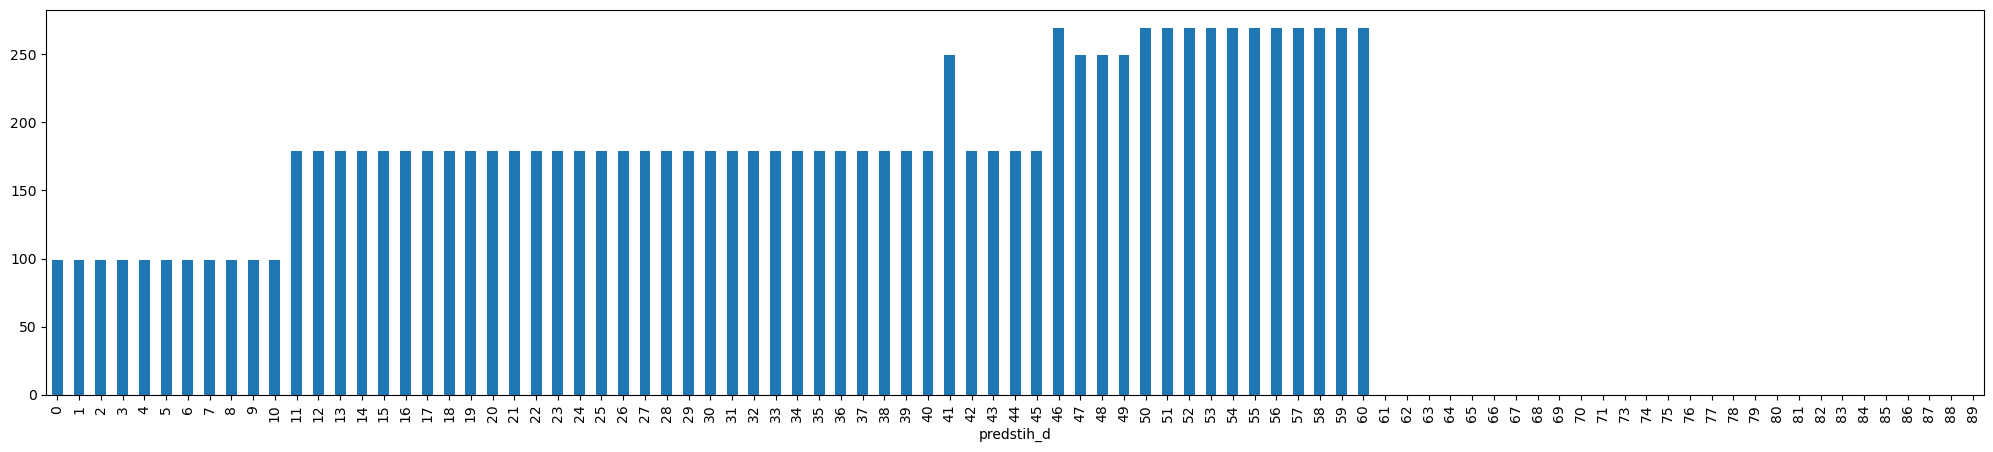

In [22]:
df.drop_duplicates(subset=['odjezd','odkud','kam','predstih_d'], keep='last').groupby('predstih_d')['cena'].min().plot.bar(figsize=(25,5))

In [23]:
df.groupby(['odkud','spoj'])['cena'].min().nsmallest(20)

C:\Users\micha\AppData\Local\Temp\ipykernel_5520\3902872103.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['odkud','spoj'])['cena'].min().nsmallest(20)


odkud  spoj       
Brno   RJ ne 05:03     99.0
       RJ pá 05:03     99.0
       RJ so 05:03     99.0
       RJ st 05:03     99.0
       RJ út 05:03     99.0
       RJ čt 05:03     99.0
Praha  RJ po 20:56     99.0
       RJ st 20:56     99.0
       RJ út 20:56     99.0
       RJ čt 20:56     99.0
Brno   RJ ne 06:09    179.0
       RJ po 05:03    179.0
       RJ po 06:09    179.0
       RJ po 19:09    179.0
       RJ út 18:09    179.0
       RJ út 19:09    179.0
Praha  RJ ne 06:15    179.0
       RJ po 18:15    179.0
       RJ po 20:47    179.0
       RJ st 06:15    179.0
Name: cena, dtype: float64

In [24]:
def obdobi(radek):
    return f"""{radek['odjezd'].dayofweek + 1}-{radek['odjezd'].hour // 4}"""

In [25]:
df['obdobi'] = df.apply(lambda row: obdobi(row), axis=1)

In [26]:
df.groupby("obdobi")['cena'].median().nlargest(10)

obdobi
5-3    449.0
5-0    435.0
5-2    419.0
7-0    419.0
7-3    419.0
5-4    399.0
7-4    399.0
1-0    379.0
3-0    359.0
4-2    359.0
Name: cena, dtype: float64

In [27]:
spicka = df.groupby("obdobi")['cena'].median().nlargest(5).index.to_list()
spicka

['5-3', '5-0', '5-2', '7-0', '7-3']

<Axes: xlabel='predstih_d', ylabel='cena'>

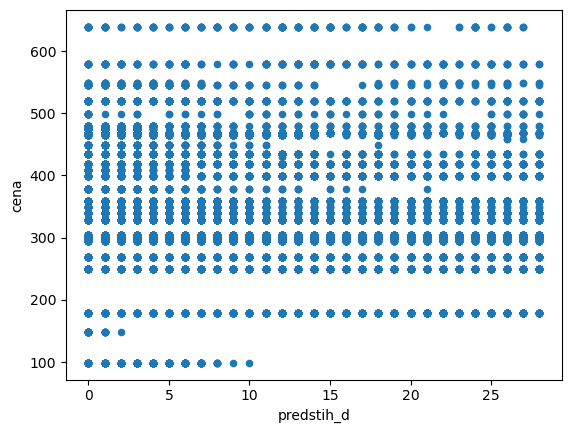

In [28]:
df[(df['predstih_d'] <= 28)].plot.scatter(x='predstih_d',y='cena')

In [29]:
df[df['predstih_h'] <= 24]['cena'].quantile([0.1,0.25,0.33,0.5,0.66,0.75,0.9,1])

0.10    299.0
0.25    329.0
0.33    329.0
0.50    359.0
0.66    359.0
0.75    404.0
0.90    449.0
1.00    639.0
Name: cena, dtype: float64

In [79]:
df[df['predstih_h'] <= 24].groupby("spoj")['cena'].median().nlargest(20)

spoj
ČD pá 00:40    545.0
RJ ne 18:15    524.0
RJ pá 10:09    524.0
ČD ne 00:29    519.0
ČD ne 00:40    519.0
ČD pá 00:29    519.0
ČD so 00:29    519.0
ČD so 00:40    519.0
ČD st 00:40    519.0
ČD út 00:40    519.0
ČD čt 00:29    519.0
ČD čt 00:40    519.0
RJ ne 17:15    499.0
ČD po 00:29    479.0
ČD po 00:40    479.0
ČD st 00:29    479.0
ČD út 00:29    479.0
ČD pá 12:44    475.0
ČD pá 13:44    475.0
ČD pá 14:44    475.0
Name: cena, dtype: float64

In [30]:
df[df['predstih_h'] <= 24]['cena'].median()

359.0

In [31]:
df['predstih_24h'] = df['predstih_h'] / 24

<Axes: xlabel='predstih_24h', ylabel='cena'>

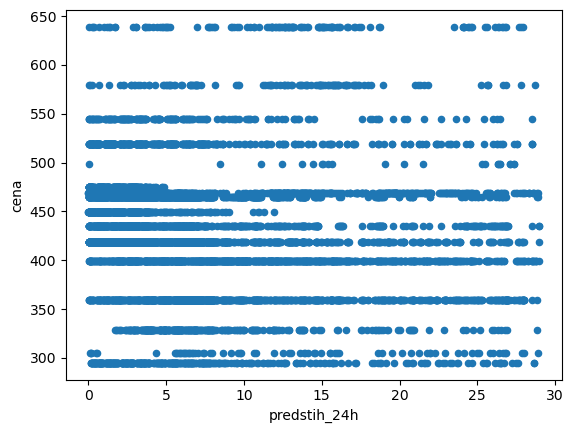

In [32]:
df[df['obdobi'].isin(spicka) & (df['predstih_d'] <= 28)].plot.scatter(x='predstih_24h',y='cena')

In [33]:
df.sort_values(by="cena",ascending=False).head(50)

,oscrapovano,prodejce,odkud,kam,odjezd,predstih,predstih_d,predstih_h,cena,prostredek,volnych_mist,obsazenost,jizdni_doba,vzdalenost,zpozdeni,cena_poznamka,den,prestupy,vlaky,mistenka_zdarma,nahradni_bus,volna_mista_economy,volna_mista_economy_plus,volna_mista_economy_business,volna_mista_premium,spoj,obdobi,predstih_24h
469556,2024-11-16 08:09:29,RJ,Brno,Praha,2024-11-17 18:09:00,1 days 09:59:31,1,33.991944,639.0,vlak,2.0,None,148.0,NaN,None,None,ne,0,None,None,None,NaN,NaN,NaN,NaN,RJ ne 18:09,7-4,1.416331
214962,2024-11-09 18:14:10,RJ,Brno,Praha,2024-11-17 12:09:00,7 days 17:54:50,7,185.913889,639.0,vlak,1.0,None,148.0,NaN,None,None,ne,0,None,None,None,NaN,NaN,NaN,NaN,RJ ne 12:09,7-3,7.746412
289719,2024-11-11 18:12:34,RJ,Brno,Praha,2024-11-15 10:09:00,3 days 15:56:26,3,87.940556,639.0,vlak,1.0,None,148.0,NaN,None,None,pá,0,None,None,None,NaN,NaN,NaN,NaN,RJ pá 10:09,5-2,3.664190
210403,2024-11-09 16:07:55,RJ,Brno,Praha,2024-11-17 12:09:00,7 days 20:01:05,7,188.018056,639.0,vlak,2.0,None,148.0,NaN,None,None,ne,0,None,None,None,NaN,NaN,NaN,NaN,RJ ne 12:09,7-3,7.834086
210534,2024-11-09 16:08:19,RJ,Brno,Praha,2024-11-22 14:09:00,12 days 22:00:41,12,310.011389,639.0,vlak,2.0,None,148.0,NaN,None,None,pá,0,None,None,None,NaN,NaN,NaN,NaN,RJ pá 14:09,5-3,12.917141
210571,2024-11-09 16:08:26,RJ,Brno,Praha,2024-11-24 14:09:00,14 days 22:00:34,14,358.009444,639.0,vlak,1.0,None,148.0,NaN,None,None,ne,0,None,None,None,NaN,NaN,NaN,NaN,RJ ne 14:09,7-3,14.917060
594963,2024-11-19 12:06:31,RJ,Praha,Brno,2024-11-22 13:15:00,3 days 01:08:29,3,73.141389,639.0,vlak,2.0,None,151.0,NaN,None,None,pá,0,None,None,None,NaN,NaN,NaN,NaN,RJ pá 13:15,5-3,3.047558
615426,2024-11-19 22:08:53,RJ,Brno,Praha,2024-12-13 10:09:00,23 days 12:00:07,23,564.001944,639.0,vlak,1.0,None,148.0,NaN,None,None,pá,0,None,None,None,NaN,NaN,NaN,NaN,RJ pá 10:09,5-2,23.500081
447275,2024-11-15 16:13:33,RJ,Brno,Praha,2024-11-29 10:09:00,13 days 17:55:27,13,329.924167,639.0,vlak,2.0,None,148.0,NaN,None,None,pá,0,None,None,None,NaN,NaN,NaN,NaN,RJ pá 10:09,5-2,13.746840
215125,2024-11-09 18:14:42,RJ,Brno,Praha,2024-11-24 14:09:00,14 days 19:54:18,14,355.905000,639.0,vlak,1.0,None,148.0,NaN,None,None,ne,0,None,None,None,NaN,NaN,NaN,NaN,RJ ne 14:09,7-3,14.829375


In [73]:
df[df['spoj'] == 'ČD čt 09:39'].groupby("predstih_d")['cena'].median()

predstih_d
0     359.0
1     359.0
2     359.0
3     359.0
4     329.0
5     329.0
6     359.0
7     359.0
8     329.0
9     329.0
10    329.0
11    329.0
12    329.0
13    329.0
14    329.0
15    329.0
16    329.0
18    329.0
20    329.0
22    329.0
23    329.0
25    329.0
26    329.0
28    329.0
30    329.0
33    329.0
34    329.0
36    329.0
37    329.0
45    329.0
46    329.0
47    329.0
58    329.0
59    329.0
60      NaN
64      NaN
66      NaN
67      NaN
68      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
88      NaN
Name: cena, dtype: float64